In [2]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump


# Load your dataset


In [6]:
base_path = "/content/drive/MyDrive/emotionDetection/AudioData"  # replace with the path to your 'AudioData' folder
actor_folders = [os.path.join(base_path, f) for f in os.listdir(base_path) if f in ['DC', 'JE', 'JK', 'KL']]

In [7]:
emotion_dict = {'a': 'anger', 'd': 'disgust', 'f': 'fear', 'h': 'happiness', 'n': 'neutral', 'sa': 'sadness', 'su': 'surprise'}


In [12]:
file_paths = []
labels = []
for actor_folder in actor_folders:
    for file_name in os.listdir(actor_folder):
        file_path = os.path.join(actor_folder, file_name)
        file_paths.append(file_path)

        # Extract the emotion label from the file name
        emotion_prefix = file_name.split('0')[0] if '0' in file_name else file_name[0]
        if len(emotion_prefix) > 1 and emotion_prefix[0] == 's':
            emotion_prefix = emotion_prefix[:2]
        else:
            emotion_prefix = emotion_prefix[0]
        emotion_label = emotion_dict.get(emotion_prefix, 'unknown')

        labels.append(emotion_label)  # This line should be inside the inner loop


# Preprocess your data


In [13]:
def extract_features(file_path, max_pad_len=40):
    audio_data, sample_rate = librosa.load(file_path)
    mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40)
        # Flatten the array
    mfccs = mfccs.flatten()

    # If the number of features is less than max_pad_len, pad with zeros
    if len(mfccs) < max_pad_len:
        mfccs = np.pad(mfccs, (0, max_pad_len - len(mfccs)))

    # If the number of features is more than max_pad_len, truncate the excess
    elif len(mfccs) > max_pad_len:
        mfccs = mfccs[:max_pad_len]

    return mfccs


# Extract features for all files


In [14]:
features = [extract_features(fp) for fp in file_paths]


# Convert the list of feature vectors to a numpy array

In [15]:
features = np.array(features)

# Split your data into a training set and a test set

In [16]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2)


# Train your model

In [17]:
model = SVC()
model.fit(features_train, labels_train)

SVC()

# Evaluate your model


In [18]:
accuracy = model.score(features_test, labels_test)
print(f"Model accuracy: {accuracy*100}%")

Model accuracy: 27.083333333333332%


In [19]:
labels_np = np.array(labels)

# Get unique emotions and their counts

In [20]:
unique, counts = np.unique(labels_np, return_counts=True)

# Create a dictionary of emotions and their counts

In [21]:
emotion_counts = dict(zip(unique, counts))


# Create a bar plot

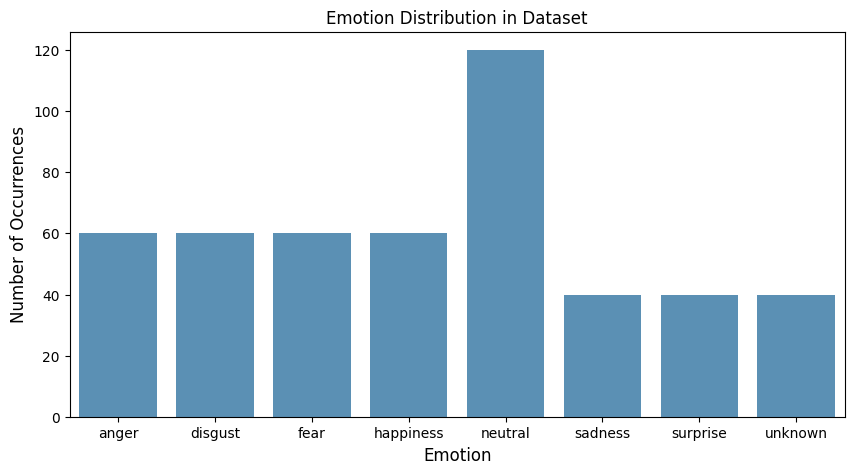

In [22]:
plt.figure(figsize=(10, 5))
sns.barplot(x=list(emotion_counts.keys()), y=list(emotion_counts.values()), alpha=0.8)
plt.title('Emotion Distribution in Dataset')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Emotion', fontsize=12)
plt.show()

# Save the Model

In [23]:
dump(model, 'model.joblib')

['model.joblib']